## Astronomy Dataset #
### Stars, Galaxies and Quasars ##
https://www.sdss.org/dr17/
http://skyserver.sdss.org/dr17/SearchTools/sql

In [1]:
# Import library
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy import units
from astroquery.skyview import SkyView
from astropy import units as u

# Exploratory Data Analysis

In [4]:
# Load Dataset
df=pd.read_csv('Skyserver_SQL1_5_2022 11_26_53 PM.csv', skiprows=5, low_memory=False)
df.head(3)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237678598097404025,15.851405,3.191167,18.05289,17.09906,16.73790,16.60352,16.56954,7712.0,301.0,5.0,435.0,9858503408339933184,STAR,-0.000662,8756.0,57687.0,450.0
1,1237678598076366970,327.767460,2.724566,17.89419,17.00824,16.73965,16.65107,16.61760,7712.0,301.0,5.0,114.0,12755446354945529856,STAR,-0.000868,11329.0,58426.0,459.0
2,1237678858476388409,11.094705,11.901323,19.29361,18.35319,18.02509,17.88756,17.84319,7773.0,301.0,2.0,383.0,6986389895423219712,STAR,-0.000979,6205.0,56187.0,658.0


In [5]:
df['class'].value_counts()

GALAXY    51646
STAR      37846
QSO       10508
Name: class, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   objid      100003 non-null  object 
 1   ra         100000 non-null  float64
 2   dec        100000 non-null  float64
 3   u          100000 non-null  float64
 4   g          100000 non-null  float64
 5   r          100000 non-null  float64
 6   i          100000 non-null  float64
 7   z          100000 non-null  float64
 8   run        100000 non-null  float64
 9   rerun      100000 non-null  float64
 10  camcol     100000 non-null  float64
 11  field      100000 non-null  float64
 12  specobjid  100003 non-null  object 
 13  class      100000 non-null  object 
 14  redshift   100000 non-null  float64
 15  plate      100000 non-null  float64
 16  mjd        100000 non-null  float64
 17  fiberid    100000 non-null  float64
dtypes: float64(15), object(3)
memory usage: 13.7+ MB


### Data ###
-  ra, dec : Right ascension (ra) and Declination (dec). 
-  u,g, r, i, z : spectral bands [Ultraviolet (u), Green (g), Red (r), Near Infrared (i), Infrared (z)]
-  run : Id scan
-  rerun : Reprocess run
-  camcol : id scanline of run
-  field : Field number
-  plate : Each spectroscopic exposure employs a large, thin, circular metal plate that positions optical fibers
-  mjd : Modified Julian Date, i.e. the date at which the data were taken
-  fiberid : fiber ID

In [7]:
# drop columns
df.drop(['run', 'rerun', 'camcol', 'field', 'specobjid', 'plate', 'mjd', 'fiberid'], axis=1, inplace=True)

In [8]:
# reorder columns
df=df[['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift', 'class']]

In [9]:
# nulls
df.isnull().sum().sum()

27

In [10]:
df.index[df.isnull().any(axis=1)]

Int64Index([100000, 100001, 100002], dtype='int64')

In [11]:
df.tail()

,objid,ra,dec,u,g,r,i,z,redshift,class
99998,1237671266569486363,190.855937,-2.145976,16.90170,15.27494,14.67725,14.59076,14.48500,-0.000040,STAR
99999,1237673739394286433,97.848681,26.234867,17.97266,16.63872,16.16548,15.95346,15.84563,0.000094,STAR
100000,</div>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,</div>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,</div>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum().sum()

0

In [14]:
df.describe()

,ra,dec,u,g,r,i,z,redshift
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,177.915604,25.050633,18.638953,17.406257,16.879252,16.622287,16.462865,0.169856
std,78.002885,20.512636,0.829678,0.982824,1.130434,1.206917,1.280508,0.437127
min,0.013890,-19.364576,10.611810,9.668339,9.005167,8.896696,8.947795,-0.004136
25%,136.793076,6.798342,18.215430,16.852100,16.193920,15.861390,15.614970,0.000003
50%,180.707467,23.988488,18.873725,17.514180,16.888850,16.596690,16.424970,0.046361
75%,224.657528,40.307321,19.272690,18.053047,17.581523,17.340333,17.227990,0.095396
max,359.999615,84.490494,19.599990,19.996050,31.990100,32.141470,29.383740,7.011245


In [15]:
df_orig_drop = df.copy()

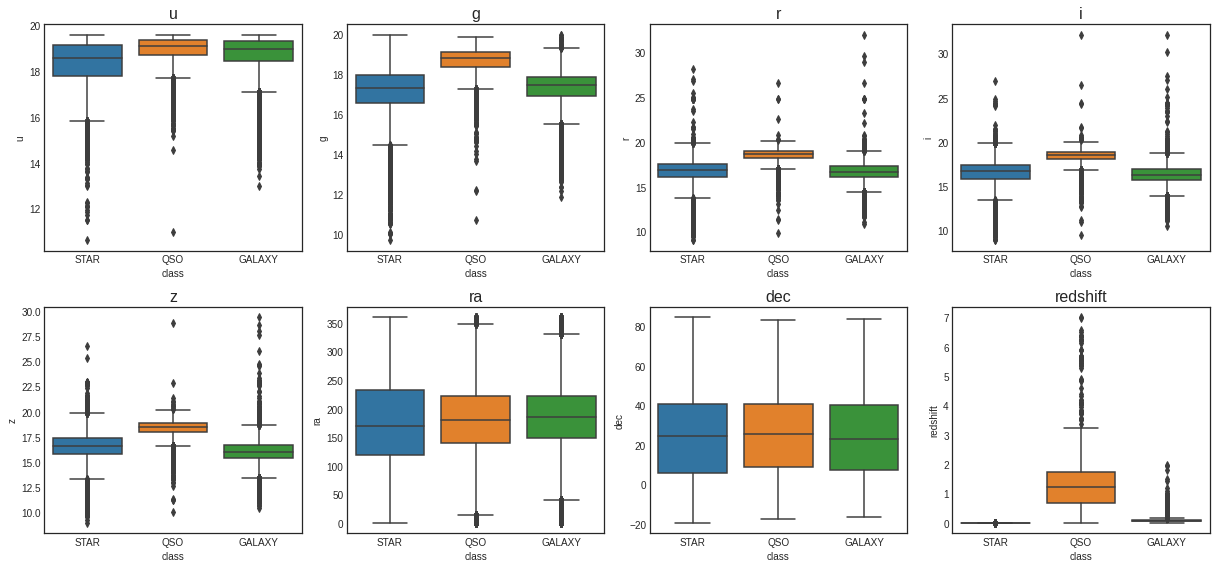

In [16]:
# BoxPlot
cols = ['u', 'g', 'r', 'i', 'z', 'ra', 'dec', 'redshift']
plt.figure(figsize = (17, 8));
plt.style.use('seaborn-white')
i=1
for cat in cols: 
    ax=plt.subplot(2,4,i)
    i+=1
    sns.boxplot(x='class',y=cat,data=df);
    plt.title(cat,fontsize=16)
    plt.tight_layout();

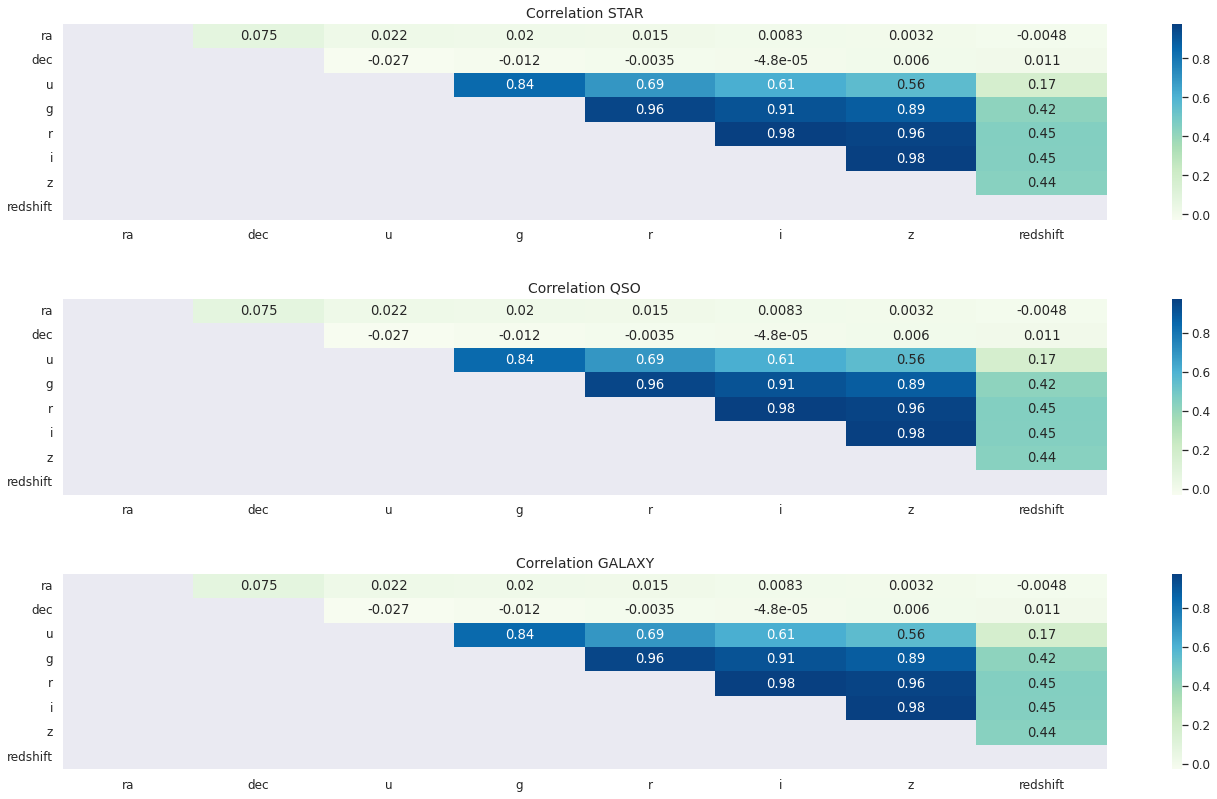

In [17]:
# Correlations
sns.set(font_scale=1.1)
fig, axs = plt.subplots(3, 1, sharex = False, figsize=(20,12))
i=0
for astro in df['class'].unique().tolist():
    axs[i].set_title('Correlation {}'.format(astro), size=14)
    corr = df.corr()
    mask = np.tril(np.ones_like(corr, dtype=np.bool_))
    sns.heatmap(corr, annot=True, cmap='GnBu', mask=mask, ax=axs[i]);
    i+=1
    plt.tight_layout(pad=3);

In [18]:
# Frequency Analysis

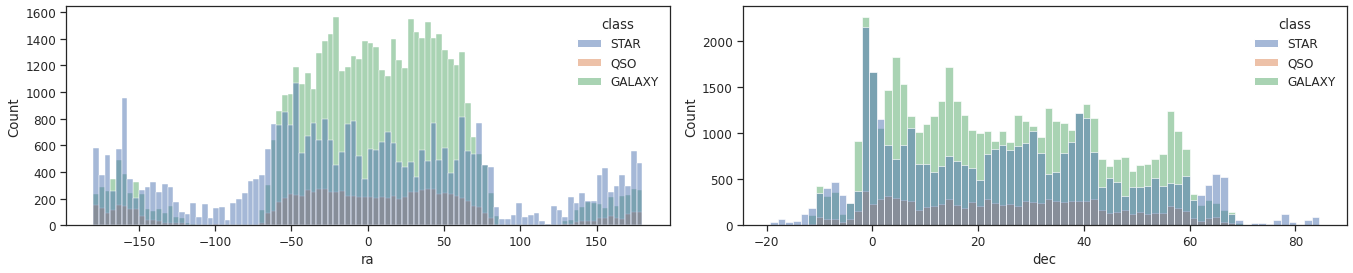

In [19]:
# ra & dec by class
plt.figure(figsize=(19,4))
sns.set_style("ticks")
plt.subplot(1, 2, 1)
sns.histplot(data=df, x=df['ra']-180, legend=True, hue='class', stat='count');# ra has range 0-360 (plot -180 to 180)
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='dec', legend=True, hue='class', stat='count'); # dec has range -90 to 90
plt.tight_layout()

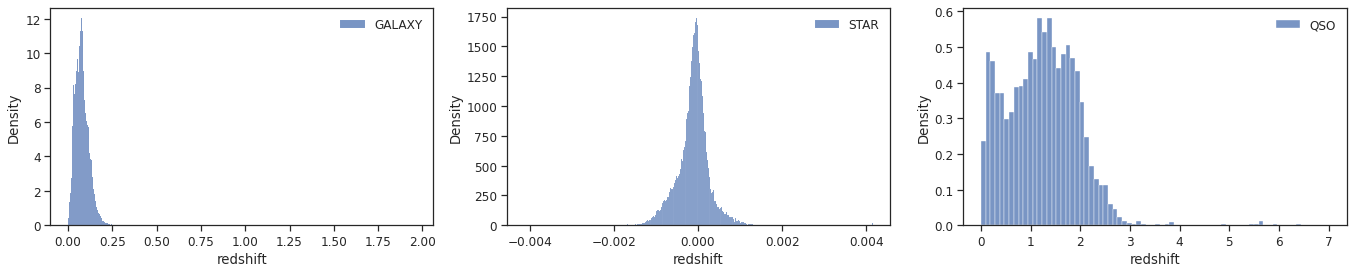

In [20]:
plt.figure(figsize=(19,4))
sns.set_style("ticks")
plt.subplot(1, 3, 1)
sns.histplot(df[df['class']=='GALAXY']['redshift'], label = 'GALAXY', stat='density')
plt.legend()
plt.subplot(1, 3, 2)
sns.histplot(df[df['class']=='STAR']['redshift'], label = 'STAR', stat='density')
plt.legend()
plt.subplot(1, 3, 3)
sns.histplot(df[df['class']=='QSO']['redshift'], label = 'QSO', stat='density')
plt.legend()
plt.tight_layout()

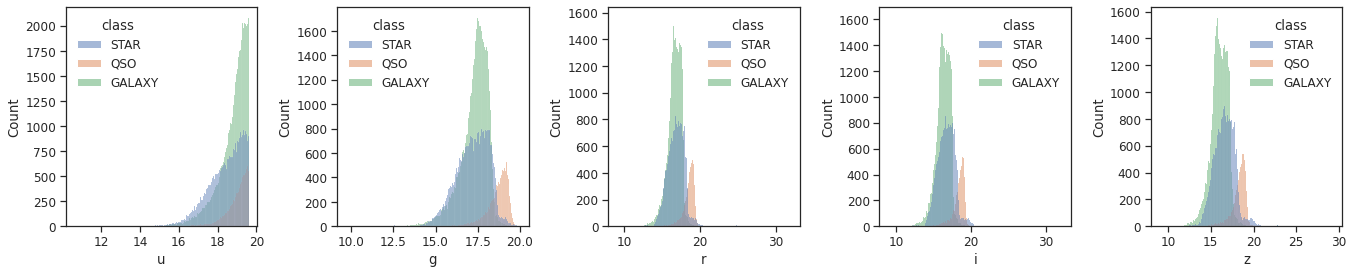

In [21]:
spectral_cols = ['u', 'g', 'r', 'i', 'z']
plt.figure(figsize=(19,4))
sns.set_style("ticks")
j=1
for var in spectral_cols:
    plt.subplot(1, 5, j)
    sns.histplot(data=df, x=var, legend=True, hue='class'); 
    j+=1
plt.tight_layout()

In [22]:
# MinMax Scaler spectral bands
max_spectral=df[spectral_cols].max().max()
min_spectral=df[spectral_cols].min().min()
std_mean_spectral=df[spectral_cols].std().mean()
mean_spectral=df[spectral_cols].mean().mean()

In [23]:
df[spectral_cols]=df[spectral_cols].apply(lambda x: (x-min_spectral)/(max_spectral-min_spectral))

In [24]:
df[spectral_cols]

,u,g,r,i,z
0,0.393903,0.352869,0.337332,0.331551,0.330089
1,0.387076,0.348962,0.337407,0.333596,0.332157
2,0.447280,0.406822,0.392707,0.386791,0.384882
3,0.412449,0.374225,0.359532,0.349941,0.336057
4,0.414881,0.374811,0.359536,0.354288,0.351311
...,...,...,...,...,...
99995,0.454329,0.374802,0.333577,0.316649,0.302890
99996,0.411313,0.341260,0.303449,0.286226,0.273822
99997,0.423748,0.335415,0.296142,0.277715,0.264747
99998,0.344379,0.274395,0.248682,0.244961,0.240411


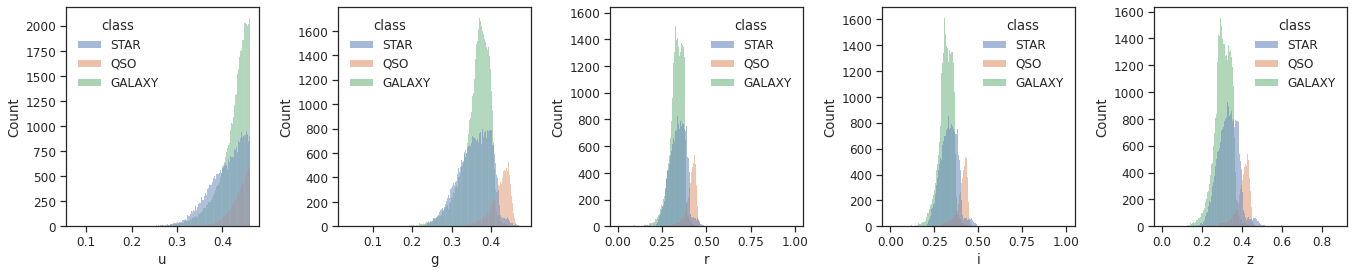

In [25]:
spectral_cols = ['u', 'g', 'r', 'i', 'z']
plt.figure(figsize=(19,4))
sns.set_style("ticks")
j=1
for var in spectral_cols:
    plt.subplot(1, 5, j)
    sns.histplot(data=df, x=var, legend=True, hue='class'); 
    j+=1
plt.tight_layout()

In [26]:
# Normalization ra & dec
df['ra']=df['ra']/360
df['dec']=df['dec']/90

In [27]:
# Standard Scaler Redshift
min_redshift=df['redshift'].min()
max_redshift=df['redshift'].max()

In [28]:
df['redshift']=df['redshift'].apply(lambda x: (x-min_redshift)/(max_redshift-min_redshift))

In [29]:
df.describe()

,ra,dec,u,g,r,i,z,redshift
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.494210,0.278340,0.419116,0.366085,0.343413,0.332358,0.325500,0.024802
std,0.216675,0.227918,0.035693,0.042282,0.048632,0.051922,0.055088,0.062310
min,0.000039,-0.215162,0.073785,0.033196,0.004666,0.000000,0.002198,0.000000
25%,0.379981,0.075537,0.400896,0.342245,0.313930,0.299624,0.289023,0.000590
50%,0.501965,0.266539,0.429216,0.370728,0.343826,0.331257,0.323870,0.007198
75%,0.624049,0.447859,0.446380,0.393910,0.373625,0.363249,0.358416,0.014188
max,0.999999,0.938783,0.460460,0.477499,0.993488,1.000000,0.881361,1.000000


In [30]:
df.to_csv('clean_Skyserver_SQL1_5_2022 11_26_53 PM.csv', index=False)

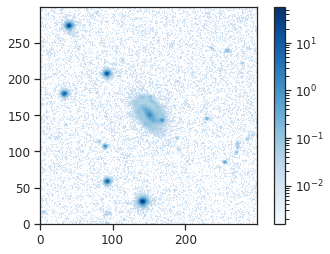

In [31]:
#galaxy visualization

df_orig_drop_galaxy=df_orig_drop[df_orig_drop['class']=='GALAXY'].sample(n=1)

coords = SkyCoord(df_orig_drop_galaxy.ra, df_orig_drop_galaxy.dec, unit=(u.deg, u.deg))
#survey=['SDSSg', 'SDSSi', 'SDSSr', 'SDSSu', 'SDSSz']
img = SkyView.get_images(position=coords, survey=['SDSSg'])

from matplotlib.colors import LogNorm

plt.imshow(img[0][0].data, cmap='Blues', norm=LogNorm(), origin='lower')
plt.colorbar()